In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
comments = pd.read_csv(r"D:\Text_data_Analysis_project\Youtube_data_Analysis_project\UScomments.csv",on_bad_lines ="skip")

C:\Users\Keerthanaa\AppData\Local\Temp\ipykernel_15344\3483165593.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r"D:\Text_data_Analysis_project\Youtube_data_Analysis_project\UScomments.csv",on_bad_lines ="skip")


In [4]:
comments.shape

(691400, 4)

In [12]:
comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [13]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [14]:
comments.dropna(inplace = True)

In [15]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

PERFORM SENTIMENT ANALYSIS

In [55]:
import nltk

In [56]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Keerthanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [58]:
sia = SentimentIntensityAnalyzer()

In [59]:
comments["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [60]:
sia.polarity_scores("MY FAN . attendance")['compound']

0.4648

In [61]:
sentiment_scores = []

for comment in comments['comment_text']:
    score = sia.polarity_scores(str(comment))['compound']
    sentiment_scores.append(score)

In [62]:
sample_df = comments[0:10000]

In [63]:
comments['polarity'] = sentiment_scores

In [64]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.5719
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.7717


WORDCLOUD ANALYSIS OF DATA

In [71]:
# +ve --> 0.8 to 1
# -ve --> -0.8 to -1
filter_pos = (comments["polarity"]>= 0.8) & (comments["polarity"] <= 1.0)

In [72]:
comments_pos = comments[filter_pos]

In [73]:
comments_pos.shape

(64310, 5)

In [74]:
filter_neg = (comments["polarity"]>= -1.0) & (comments["polarity"] <= -0.8)

In [75]:
comments_neg = comments[filter_neg]

In [76]:
comments_neg.shape

(16148, 5)

In [77]:
type(comments_pos["comment_text"])

pandas.core.series.Series

In [1]:
import sys; print(sys.executable)   # should point to ...\conda-envs\nlp_env\python.exe
%pip install wordcloud


C:\Users\Keerthanaa\conda-envs\nlp_env\python.exe
Note: you may need to restart the kernel to use updated packages.


In [80]:
total_pos_cmts = ' '.join(comments_pos["comment_text"])

In [82]:
total_pos_cmts[0:1000]

"I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍 if you get allot of diss likes do you get on the top comments? lets see diss like this please I love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\\nBecause everyone loves it and will be Unique and Pashan will be creative and I hope you will see it bye This looks like a great video, but after you are done would you be kind enough to check out my new YouTube channel and give me some feedback? Maybe even subscribing? :) Congrats Logan love u so much someday I would love to meet u #1 fan of the logang ❤️ Well done I LOVE! You so much :D I am very happy for this man and we need to spread more love. United we stand, divided we fall. And this could in all honestly become a good thing for you. You sit on a platform where you could really educate people especially when so many of your fans seem to think it's okay to be said. Rea

In [78]:
from wordcloud import WordCloud , STOPWORDS
print("done")

done


In [84]:
 wordcloud_positive = WordCloud(stopwords= set(STOPWORDS)).generate(total_pos_cmts)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

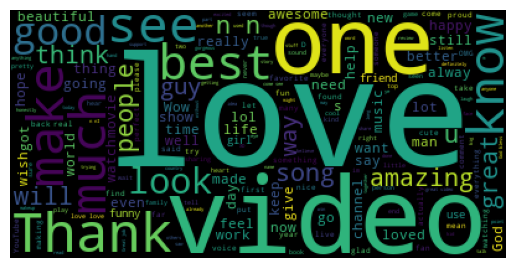

In [87]:
plt.imshow(wordcloud_positive)
plt.axis("off")

In [88]:
total_neg_cmts = ' '.join(comments_neg["comment_text"])

In [89]:
total_neg_cmts[0:1000]

"Evan is being a douch Logans getting pissed, Logan should have went to smash his game system then evan would have cried 😂 & Evans not gonna be able to take care of a pitbull tell his ass no, its gonna kill kong !!! No one fucking cares. You're a 12 year old. There comes a point where you're too old for the whole I'm so goofy and fun every second of every day schtick. Yeah you're impressing douchey 14 year olds who waste their lives on YouTube but to the real world you and your fucktard brother are nothing more than a pair of over privileged, white privileged toddlers. Grow the fuck up man. You think this will be your life forever. One day you're going to face the real world and realize you can't just jump around and scream your way to a real job. Or you can't hair flip your way out of an inevitable date rape charge. OK guys i get that the word was once used as a demeaning term and that the history of that word will never change, yes pewds fucked up but still it quite obviously wasn't 

In [90]:
wordcloud_negative = WordCloud( stopwords = set(STOPWORDS)).generate(total_neg_cmts)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

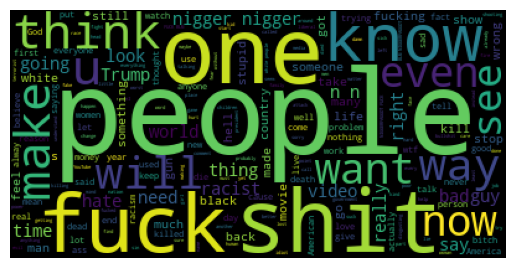

In [91]:
plt.imshow(wordcloud_negative)
plt.axis("off")

PERFORM EMOJI'S ANALYSIS

In [93]:
! pip install emoji==2.14.1

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------------------------- ---- 524.3/590.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 590.6/590.6 kB 1.5 MB/s  0:00:00


In [94]:
import emoji

In [95]:
emoji.__version__

'2.14.1'

In [96]:
comments.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000


In [97]:
#emojis_info = emoji.emoji_list("trending 😉	")
#emojis_info

[{'match_start': 9, 'match_end': 10, 'emoji': '😉'}]

In [98]:
#[i["emoji"] for i in emojis_info]

['😉']

In [104]:
all_emojis_found = []
for comment in comments["comment_text"]:
    emojis_info = emoji.emoji_list(comment)
    emojis_found = [i["emoji"] for i in emojis_info]
    all_emojis_found.extend(emojis_found)

In [105]:
all_emojis_found[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [106]:
len(all_emojis_found)

288867

In [108]:
from collections import Counter

In [111]:
emojis_count_list_top10 = Counter(all_emojis_found).most_common(10)
emojis_count_list_top10

[('😂', 36987),
 ('😍', 33453),
 ('❤️', 16911),
 ('❤', 14167),
 ('🔥', 8694),
 ('😭', 8398),
 ('😘', 5545),
 ('💖', 5359),
 ('💕', 5147),
 ('👍', 4251)]

In [120]:
emojis = [emoji for emoji, count in emojis_count_list_top10]
emojis

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']

In [121]:
counts = [count for emoji, count in emojis_count_list_top10]
counts

[36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]

In [122]:
! pip install plotly

In [135]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [136]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [137]:
iplot([go.Bar(x=emojis, y=counts)])


COLLECT ENTIRE DATA OF YOUTUBE

In [138]:
import os

In [144]:
files = os.listdir(r"D:\Text_data_Analysis_project\Youtube_data_Analysis_project\additional_data")

In [145]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [147]:
files_csv = [file for file in files if '.csv' in file] 
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [155]:
full_df= pd.DataFrame()
path = r"D:\Text_data_Analysis_project\Youtube_data_Analysis_project\additional_data"

for file in files_csv:
   current_df = pd.read_csv(path+ '/' +file, encoding = 'iso-8859-1')
   full_df = pd.concat([full_df, current_df], ignore_index=True)


In [157]:
full_df.shape

(375942, 16)

In [159]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [160]:
full_df = full_df.drop_duplicates()

In [161]:
full_df.shape

(339525, 16)

In [ ]:
full_df.to_csv()

In [162]:
full_df[0:1000].to_csv(r"D:\Text_data_Analysis_project\export_data/youtube_sample.csv", index = False)

In [165]:
full_df[0:1000].to_json(r"D:\Text_data_Analysis_project\export_data/youtube_sample.json")

MOST LIKED CATEGORY

full_df.head(5)

In [167]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [168]:
json_df=  pd.read_json(r"D:\Text_data_Analysis_project\Youtube_data_Analysis_project\additional_data/US_category_id.json")

In [169]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [171]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [172]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])]= item['snippet']['title']

cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [173]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [174]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


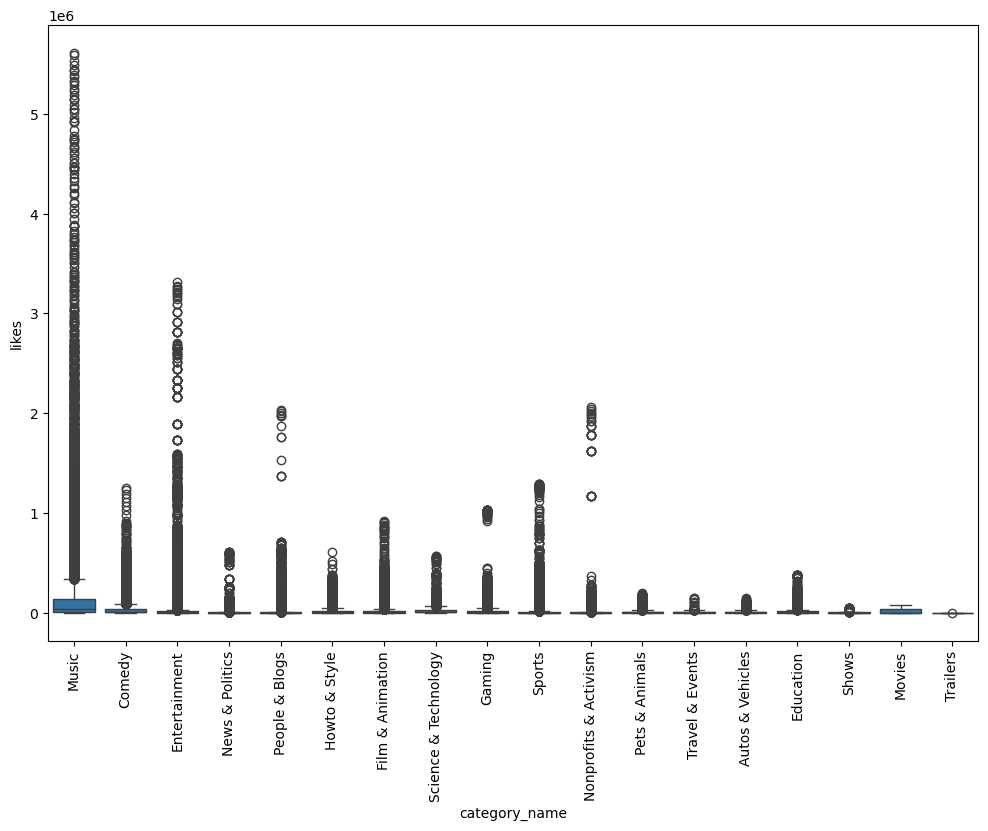

In [182]:
plt.figure(figsize = (12,8))
sns.boxplot(x='category_name', y = 'likes', data=full_df)
plt.xticks(rotation = 'vertical')
plt.show()

AUDIENCE IS ENGAGED OR NOT

In [180]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislikes_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [181]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislikes_rate', 'comment_count_rate'],
      dtype='object')

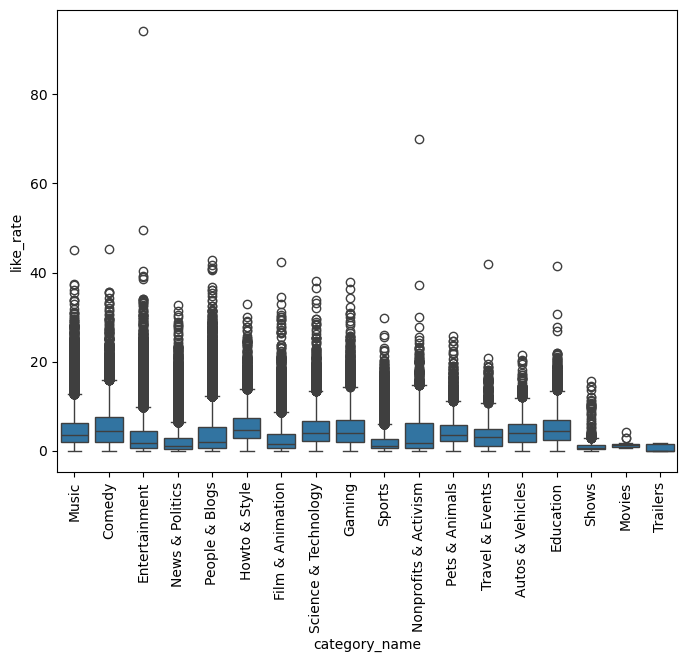

In [183]:
plt.figure(figsize = (8,6))
sns.boxplot(x='category_name', y = 'like_rate', data=full_df)
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

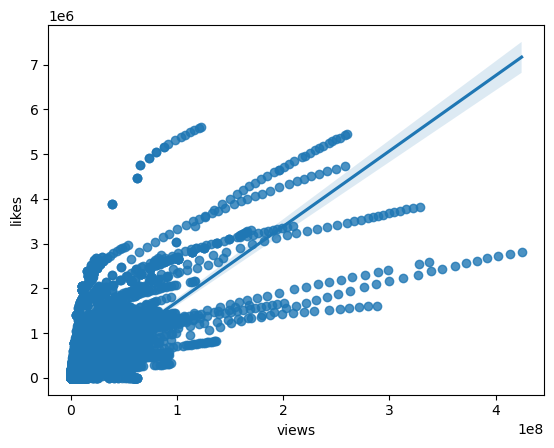

In [184]:
sns.regplot(x = 'views', y = 'likes', data = full_df)

In [185]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

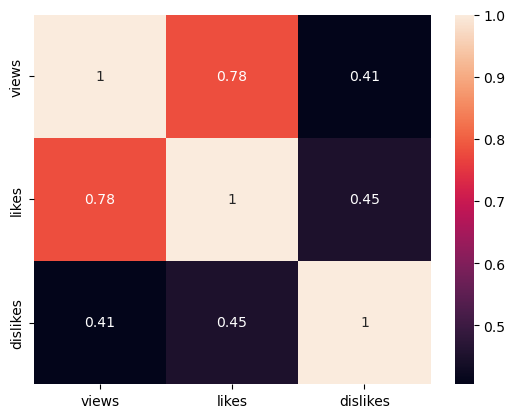

In [187]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot = True)

ANALYSING TRENDING VIDEOS

In [188]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
The Secrets of Dairy                    1
babygranderecords                       1
24 Oras News Today                      1
turk2doubleoh8                          1
BOOMPANOT.COM                           1
Name: count, Length: 37824, dtype: int64

In [191]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending = False).reset_index()

In [200]:
cdf.rename(columns = {0:'total_videos'})

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [201]:
import plotly.express as px

In [202]:
px.bar(data_frame = cdf[0:20], x = 'channel_title', y = 'total_videos')

Do Punctuations in title affect Views & Likes ?

In [203]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [204]:
import string

In [205]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [207]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [208]:
def pun_count(text):
    return len([char for char in text if char in string.punctuation])

In [210]:
sample = full_df[0:10000]

In [213]:
sample['count_punc'] =sample['title'].apply(pun_count)

C:\Users\Keerthanaa\AppData\Local\Temp\ipykernel_20244\3251305902.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [212]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

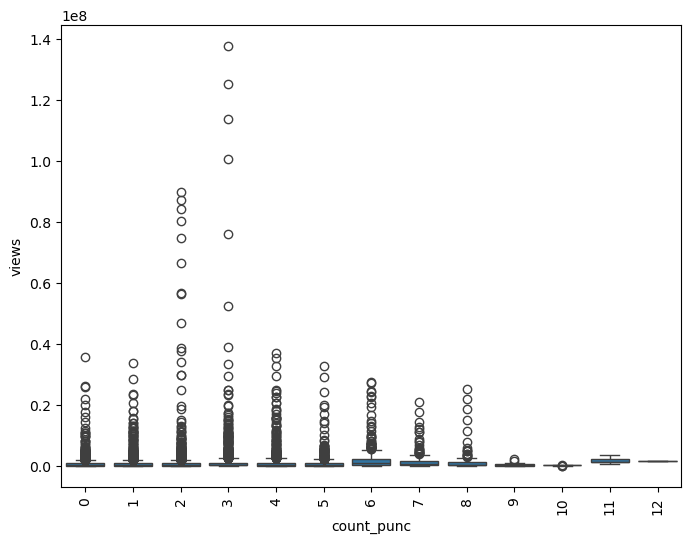

In [215]:
plt.figure(figsize = (8,6))
sns.boxplot(x='count_punc', y = 'views', data=sample)
plt.xticks(rotation = 'vertical')
plt.show()

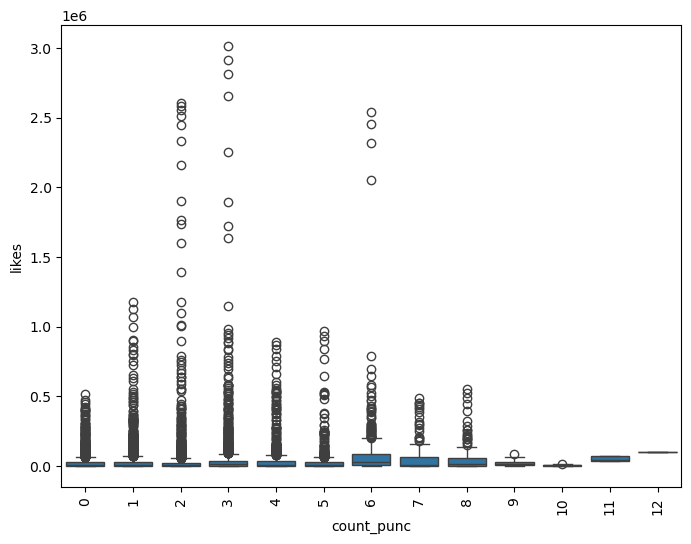

In [216]:
plt.figure(figsize = (8,6))
sns.boxplot(x='count_punc', y = 'likes', data=sample)
plt.xticks(rotation = 'vertical')
plt.show()